# User Churn Prediction

## Summary
<ul>
<li>[Part 1: Data Exploration]
<li>[Part 2: Feature Preprocessing]
<li>[Part 3: Model Training and Results Evaluation]
<li>[Part 4: Prediction Results]
</ul>

# Part 1:Data exploration


In [33]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = ["#",'']
train=pd.read_csv('dati/train_set.csv',na_values=missing_values)
test=pd.read_csv('dati/test_set.csv',na_values=missing_values)


In [34]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [35]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous,df):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by churned or not
    if continuous:
        sns.boxplot(x=col_name, y='target', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['target'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'target', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='target', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [36]:
#concatenate two dataset
conc=[train,test]
concate=pd.concat(conc,keys=['train','test'])

In [37]:
concate.target.value_counts()

0.0    8772
1.0    1228
Name: target, dtype: int64

In [38]:
missing=missing_values_table(concate)
missing.head()

Your selected dataframe has 297 columns.
There are 112 columns that have missing values.


,Missing Values,% of Total Values,type
feature_38,16975,84.9,object
feature_39,16975,84.9,object
feature_36,16975,84.9,object
feature_37,16975,84.9,object
feature_245,10189,50.9,float64


In [39]:
Mean_zero=(train.groupby('target').mean()==0)
VARIABILI_O=Mean_zero.columns[Mean_zero.sum()==0]
VARIABILI_1=Mean_zero.columns[Mean_zero.sum()==1]
VARIABILI_2=Mean_zero.columns[Mean_zero.sum()==2]

In [40]:
# VARIABILI_O
# VARIABILI_1
VARIABILI_2

Index(['feature_27', 'feature_43', 'feature_44', 'feature_45', 'feature_48',
       'feature_64', 'feature_65', 'feature_154', 'feature_155', 'feature_156',
       'feature_157', 'feature_158', 'feature_159', 'feature_160',
       'feature_161', 'feature_162', 'feature_164', 'feature_165',
       'feature_166', 'feature_172', 'feature_173', 'feature_174',
       'feature_175', 'feature_176', 'feature_177', 'feature_178',
       'feature_179', 'feature_180', 'feature_182', 'feature_183',
       'feature_184', 'feature_208', 'feature_209', 'feature_210',
       'feature_211', 'feature_212', 'feature_213', 'feature_214',
       'feature_215', 'feature_216', 'feature_218', 'feature_219',
       'feature_220', 'feature_226', 'feature_227', 'feature_228',
       'feature_229', 'feature_230', 'feature_231', 'feature_232',
       'feature_233', 'feature_234', 'feature_236', 'feature_237',
       'feature_238'],
      dtype='object')

In [41]:
Var_zero=(train.groupby('target').var())
Var_zero

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.313978e+06,0.027012,0.260316,0.014602,0.094788,0.109534,0.000456,0.637858,0.621106,0.002818,0.000010,0.004180,0.331868,5.613924,0.174820,0.053739,0.165432,0.082414,0.029729,0.082160,0.001002,0.001282,0.001289,0.063385,0.004389,0.002502,0.052174,0.0,0.012586,0.000953,2.143252e-04,1.067007e-05,0.043214,0.340364,0.02

In [42]:
concate=concate.drop(VARIABILI_2,axis=1)


In [43]:
concate.shape

(20000, 242)


# Part 2: Feature Preprocessing
### Near zero variance  Function



In [44]:
n=20000
def NEAR_ZERO_VAR(df,freqcut=95/5,unique=10):
    dfObj = pd.DataFrame(columns=['Name','freq_ratio', 'perc_unique','Nzv','lenght'])
    colonne=df.columns
    for i in colonne:
        v=pd.value_counts(df[i].values, sort=True,dropna= False)
        freq_ratio=(v.iloc[0,]/v.iloc[1,])
        valore=len(v.index)
        Percentunique=(len(v.index)/20000)*100
        nzv=(freq_ratio>freqcut)*(Percentunique<unique)
        dfObj=dfObj.append({'Name':i,'freq_ratio': freq_ratio, 'perc_unique': Percentunique,'Nzv': nzv,'lenght':valore}, ignore_index=True)
    return (dfObj)

In [45]:
Near_zero=NEAR_ZERO_VAR(concate)
# ?pd.DataFrame.append
# pd.value_counts(concate.feature_19.values, sort=True,dropna= False)

In [46]:
#vìsave variables near zero varaince  
#best 350
NameNear_zer0=Near_zero.query('Nzv==True').Name.values 
# NameNear_zer0=Near_zero.query('Nzv==True & lenght>=350').Name.values 
NameNear_zer0

array(['feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_15',
       'feature_18', 'feature_24', 'feature_25', 'feature_26',
       'feature_30', 'feature_31', 'feature_32', 'feature_41',
       'feature_42', 'feature_46', 'feature_47', 'feature_49',
       'feature_50', 'feature_62', 'feature_63', 'feature_85',
       'feature_86', 'feature_88', 'feature_95', 'feature_97',
       'feature_101', 'feature_102', 'feature_103', 'feature_108',
       'feature_109', 'feature_111', 'feature_118', 'feature_120',
       'feature_124', 'feature_126', 'feature_130', 'feature_132',
       'feature_133', 'feature_134', 'feature_135', 'feature_136',
       'feature_137', 'feature_138', 'feature_139', 'feature_140',
       'feature_141', 'feature_142', 'feature_143', 'feature_144',
       'feature_145', 'feature_146', 'feature_147', 'feature_148',
       'feature_149', 'feature_150', 'feature_151', 'feature_152',
       'feature_153', 'feature_163', 'feature_167', 'feature_168',
       'f

In [47]:
# NameNear_zer0=NameNear_zer0.tolist()


In [48]:
# lista=['feature_15','feature_102']#,'feature_108']
# NameNear_zer0=[x for x in NameNear_zer0 if x not in lista]


In [49]:
#data no zero varaince
concate_no_var=concate.drop(NameNear_zer0,axis=1)
concate_no_var.shape

(20000, 147)

In [50]:
missing_values_table(concate_no_var).head(10)
Near_zero=NEAR_ZERO_VAR(concate_no_var)
Near_zero.head()

Your selected dataframe has 147 columns.
There are 97 columns that have missing values.


,Name,freq_ratio,perc_unique,Nzv,lenght
0,index,1.000000,50.000,False,10000
1,feature_0,2.300208,0.235,False,47
2,feature_1,1.183102,0.020,False,4
3,feature_6,1.010460,7.435,False,1487
4,feature_7,3.000727,0.065,False,13


In [51]:
# best whit 7 
#best with 5
colonne_dummy=Near_zero.query('lenght<=5').Name.values
colonne_dummy.shape

(12,)

In [52]:
#transform variables in object
concate_no_var[colonne_dummy[:-1]] = concate_no_var[colonne_dummy[:-1]].astype('O')

In [23]:
# pd.crosstab(index=concate_no_var['feature_6'], columns=concate_no_var['target'],dropna=False)
#colonna 6 partilcolarmanete prolbelematica

#pca per colonna 6
# colonna_6=concate_no_var['feature_6']
# concate_no_var=concate_no_var.drop('feature_6',axis=1)


In [53]:
#encode feature_6
import category_encoders as ce
#1487
encoder= ce.BaseNEncoder(cols=['feature_6'],return_df=True,base=1487)
concate_no_var=encoder.fit_transform(concate_no_var)

In [54]:
#Get dmmy from missing values
concate_no_var_dummy=pd.get_dummies(concate_no_var, dummy_na=True)
concate_no_var_dummy.shape
# concate_dummy=pd.get_dummies(concate.drop('feature_6',axis=1), dummy_na=True)
concate_no_var_dummy.shape

(20000, 188)

In [55]:
concate_nafill=concate_no_var_dummy.fillna(value=concate_no_var_dummy.mean())
concate_nafill.shape

(20000, 188)

In [58]:
# Create correlation matrix
corr_matrix =corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [59]:
concate_nafill=concate_nafill.drop(concate_nafill[to_drop], axis=1)

In [60]:
concate_nafill.shape

(20000, 118)

# Part 3: Model Training and Results Evaluation

In [61]:
train=concate_nafill.loc['train']
test=concate_nafill.loc['test']
train=train.drop('index',axis=1)
test=test.drop('index',axis=1)
test=test.drop('target',axis=1)

X=train.drop('target',axis=1)
y=train.target

# X=pd.concat([X,s.iloc[0:10000,]],axis=1)


In [62]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [63]:
y_train.value_counts()

0.0    7017
1.0     983
Name: target, dtype: int64

In [64]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 8000 observations and 116 features
Unique target labels: [0. 1.]


In [65]:
from collections import Counter
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from xgboost import  XGBClassifier
from imblearn.over_sampling import RandomOverSampler

In [68]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

[array([0.31438127, 0.30960854, 0.27173913, 0.34170854, 0.32172471]),
 array([0.28083028, 0.32674572, 0.26466916, 0.30826141, 0.27493917])]

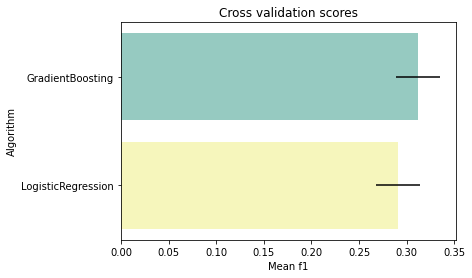

In [69]:
# Test differents algorithms 
random_state = 42
classifiers = []
# classifiers.append(SVC(random_state=random_state,C=100))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.01,n_estimators=200))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(learning_rate=0.01, max_depth= 5, max_features= 0.1, min_samples_leaf= 10, n_estimators= 300, random_state=random_state))
# classifiers.append(VotingClassifier(estimators=[('GradientBoosting', model), ('logistic',model2)], voting='soft', n_jobs=4))
# classifiers.append(MLPClassifier(random_state=random_state, hidden_layer_sizes=(50,50,50,50)))
# classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(LinearDiscriminantAnalysis())
# classifiers.append(XGBClassifier(random_state=random_state,max_depth=5, learning_rate=0.08, objective= 'binary:logistic'))

cv_results = []
for classifier in classifiers :
    #imba_pipeline = make_pipeline(SMOTE(random_state=42),classifier)
    imba_pipeline = make_pipeline(RandomOverSampler( sampling_strategy='minority',random_state=20),classifier)
    #ros = RandomOverSampler(random_state=0)
    #X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    cv_results.append(cross_val_score(imba_pipeline, X_train, y = y_train, scoring = "f1", cv = kfold, n_jobs=-1))
    #cv_results.append(cross_val_score(classifier,  X_train, y = y_train, scoring = "f1", cv = kfold, n_jobs=-1))


cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[#"SVC",
#                                                                                       "DecisionTree",
#                                                                                        "AdaBoost",
#                                                                                         "RandomForest",
#                                                                                         "ExtraTrees",
                                                                                         "GradientBoosting",
#                                                                                         "MultipleLayerPerceptron",
#                                                                                         "KNeighboors",
                                                                                       "LogisticRegression",
#                                                                                         "LinearDiscriminantAnalysis",
#                                                                                       "XGBUST"
]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean f1")
g = g.set_title("Cross validation scores")
cv_means
cv_results


# [Part 4: Prediction Results]

In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=20)
# best randomstate 20
X_resampled, y_resampled = ros.fit_resample(X, y)

In [71]:
X = pd.DataFrame(scaler.fit_transform(X_resampled.values), columns=X.columns)
test = pd.DataFrame(scaler.transform(test.values), columns=test.columns)

In [72]:
model=GradientBoostingClassifier(learning_rate=0.01, max_depth= 5, max_features= 0.1, min_samples_leaf= 10, n_estimators= 300, random_state=random_state)
# model=GradientBoostingClassifier(learning_rate=0.01, max_depth= 5, max_features= 0.1, min_samples_leaf= 80, n_estimators= 400, random_state=random_state)
# model.fit(X,y_resampled)

In [73]:
model2=LogisticRegression(random_state = random_state)


In [74]:
#ensamble
votingC = VotingClassifier(estimators=[('GradientBoosting', model), ('logistic',model2)], voting='soft', n_jobs=4)
votingC = votingC.fit(X,y_resampled)

In [75]:
y_pred_lr = votingC.predict(test)
probabiliti_0 = votingC.predict_proba(test)[:,0]

In [76]:
probabiliti_0[probabiliti_0>0.449]=0
#0.449
probabiliti_0[probabiliti_0!=0]=1
pd.DataFrame(probabiliti_0).to_csv('m.csv',index=False,header=False)


2115.0